Chi-square Statistic: 1091.59
P-value: 0.0000000000


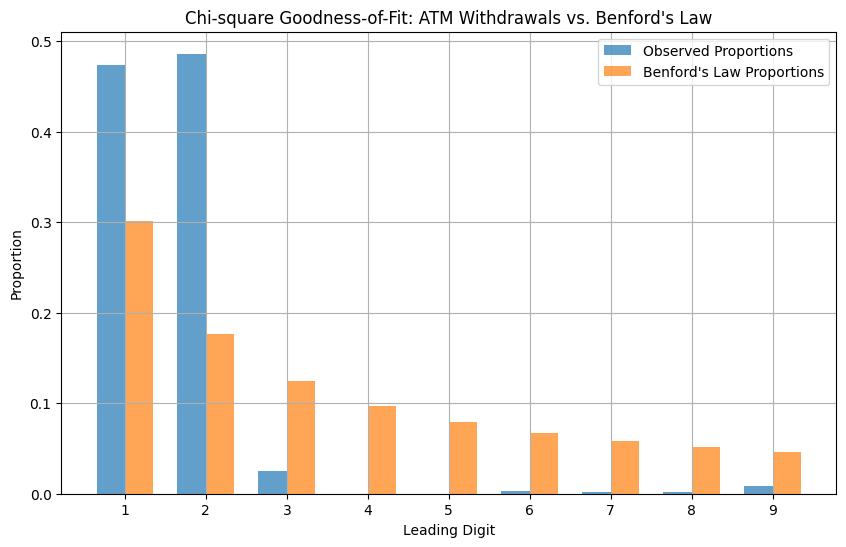

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chisquare

# Generate synthetic ATM withdrawal amounts
np.random.seed(42)
withdrawals = np.random.normal(2000, 500, 1000)

# Extract leading digits
leading_digits = [int(str(abs(int(amount)))[0]) for amount in withdrawals]

# Ensure all digits 1 through 9 are represented
observed_counts = pd.Series(leading_digits).value_counts().reindex(range(1,10), fill_value=0).sort_index()

# Benford's Law expected proportions
benford_proportions = np.array([np.log10(1 + 1/d) for d in range(1, 10)])
expected_counts = benford_proportions * len(leading_digits)

# Chi-square Goodness-of-Fit Test
chi2_stat, p_value = chisquare(f_obs=observed_counts, f_exp=expected_counts)

print(f"Chi-square Statistic: {chi2_stat:.2f}")
print(f"P-value: {p_value:.10f}")

# Visualization
plt.figure(figsize=(10, 6))
x = np.arange(1, 10)
width = 0.35

# Observed proportions
observed_proportions = observed_counts.values / len(leading_digits)

plt.bar(x - width/2, observed_proportions, width, alpha=0.7, label='Observed Proportions')
plt.bar(x + width/2, benford_proportions, width, alpha=0.7, label="Benford's Law Proportions")

plt.xticks(x)
plt.xlabel('Leading Digit')
plt.ylabel('Proportion')
plt.title("Chi-square Goodness-of-Fit: ATM Withdrawals vs. Benford's Law")
plt.legend()
plt.grid(True)
plt.show()